In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
COLS = ['time','src','dst','seqno','code','opt1','opt2']
def parse_filename(fn):
    f = open(fn).read().split('\n')
    records = []
    for i, line in enumerate(f):
        if not line: continue
        tmp = line.split(' ')
        time, elements = tmp[0],tmp[1]
        elements = elements.split(',')
        elements = [time] + elements
        if elements[1] == '': continue
        records.append(dict(zip(COLS, elements)))
    d = pd.DataFrame.from_records(records).fillna(0)#.dropna(how='all').fillna(0)
    d.loc[d['code'] == '','code'] = 0
    d.loc[d['opt1'] == '','opt1'] = 0
    d['code'] = d['code'].astype(int)
    d['opt1'] = d['opt1'].astype(int)
    d['opt2'] = d['opt2'].astype(int)
    d['time'] = pd.to_datetime(d['time'])
    return d

def parse_filename_serp(fn):
    d = parse_filename(fn)
    d['RS'] = 0
    d['MeshInfo'] = 0
    d['MeshAnnounce'] = 0
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 0), 'RS'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 1) & (d['opt2'] == 6), 'MeshInfo'] = 1
    d.loc[(d['code'] == 0) & (d['opt1'] == 8), 'MeshAnnounce'] = 1
    return d

def parse_filename_rpl(fn):
    d = parse_filename(fn)
    d['DIS'] = 0
    d['DIO'] = 0
    d['DAO'] = 0
    d.loc[(d['code'] == 0), 'DIS'] = 1
    d.loc[(d['code'] == 1), 'DIO'] = 1
    d.loc[(d['code'] == 2), 'DAO'] = 1
    return d

In [7]:
filename = 'SERP-1hop-7nodes-incremental-notraffic-run1.csv'

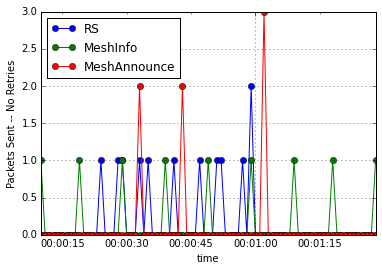

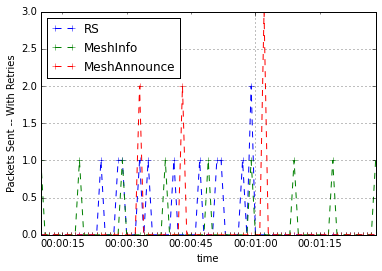

In [8]:
# this file has: idle system, then BR crashes and comes back, then 2 nodes crash and come back
d = parse_filename_serp(filename)
pf = d[['time','src','seqno','RS','MeshInfo','MeshAnnounce']]
pf = pf.set_index('time')
pf_pkt = pf.drop_duplicates(subset=['src','seqno'])

plt.clf()
f1 = pf_pkt.resample('1s',how='sum').fillna(0).plot(style='-o')
f1.set_ylabel('Packets Sent -- No Retries')

f2 = pf.resample('1s',how='sum').fillna(0).plot(style='--+')
f2.set_ylabel('Packets Sent -- With Retries')

In [9]:
filename = 'RPL-1hop-7nodes-incremental-notraffic-run1.csv'

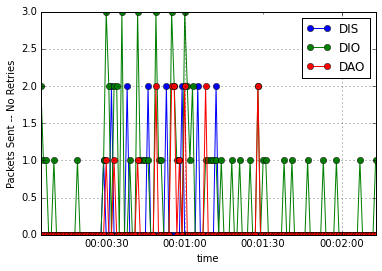

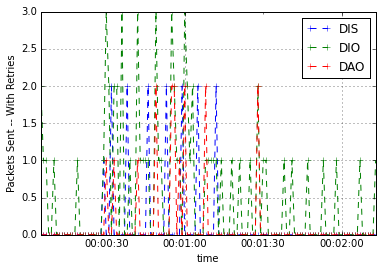

In [10]:
# this file has: idle system, then BR crashes and comes back, then 2 nodes crash and come back
d = parse_filename_rpl(filename)

pf = d[['time','src','seqno','DIS','DIO','DAO']]
pf = pf.set_index('time')
pf_pkt = pf.drop_duplicates(subset=['src','seqno'])

plt.clf()
f1 = pf_pkt.resample('1s',how='sum').fillna(0).plot(style='-o')
f1.set_ylabel('Packets Sent -- No Retries')

f2 = pf.resample('1s',how='sum').fillna(0).plot(style='--+')
f2.set_ylabel('Packets Sent -- With Retries')